In [62]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib as plt

sns.set_style("ticks")
plt.rcParams.update({"figure.dpi": 300})

In [19]:
availability_df = pd.read_csv("./data/availability_dataset.csv")

availability_df.head(5)

,timestamp,location_name,n_available,predicted,weekday,weekday_name,is_weekend,hour,week
0,2023-06-01 00:00:00,BikeTown,102,100,3,Thursday,False,0,22
1,2023-06-01 00:01:00,BikeTown,102,104,3,Thursday,False,0,22
2,2023-06-01 00:02:00,BikeTown,102,101,3,Thursday,False,0,22
3,2023-06-01 00:03:00,BikeTown,104,108,3,Thursday,False,0,22
4,2023-06-01 00:04:00,BikeTown,102,103,3,Thursday,False,0,22


In [60]:
availability_df.describe()

,timestamp,n_available,predicted,weekday,hour,week
count,927360,927360.000000,927360.000000,927360.000000,927360.00000,927360.000000
mean,2023-07-16 23:59:30.000001280,5.775754,5.273246,3.000000,11.50000,28.500000
min,2023-06-01 00:00:00,0.000000,-5.000000,0.000000,0.00000,22.000000
25%,2023-06-23 23:59:45,2.000000,1.000000,1.000000,5.75000,25.000000
50%,2023-07-16 23:59:30,4.000000,4.000000,3.000000,11.50000,28.500000
75%,2023-08-08 23:59:15,8.000000,8.000000,5.000000,17.25000,32.000000
max,2023-08-31 23:59:00,104.000000,108.000000,6.000000,23.00000,35.000000
std,NaN,5.419865,6.141049,1.989102,6.92219,3.815018


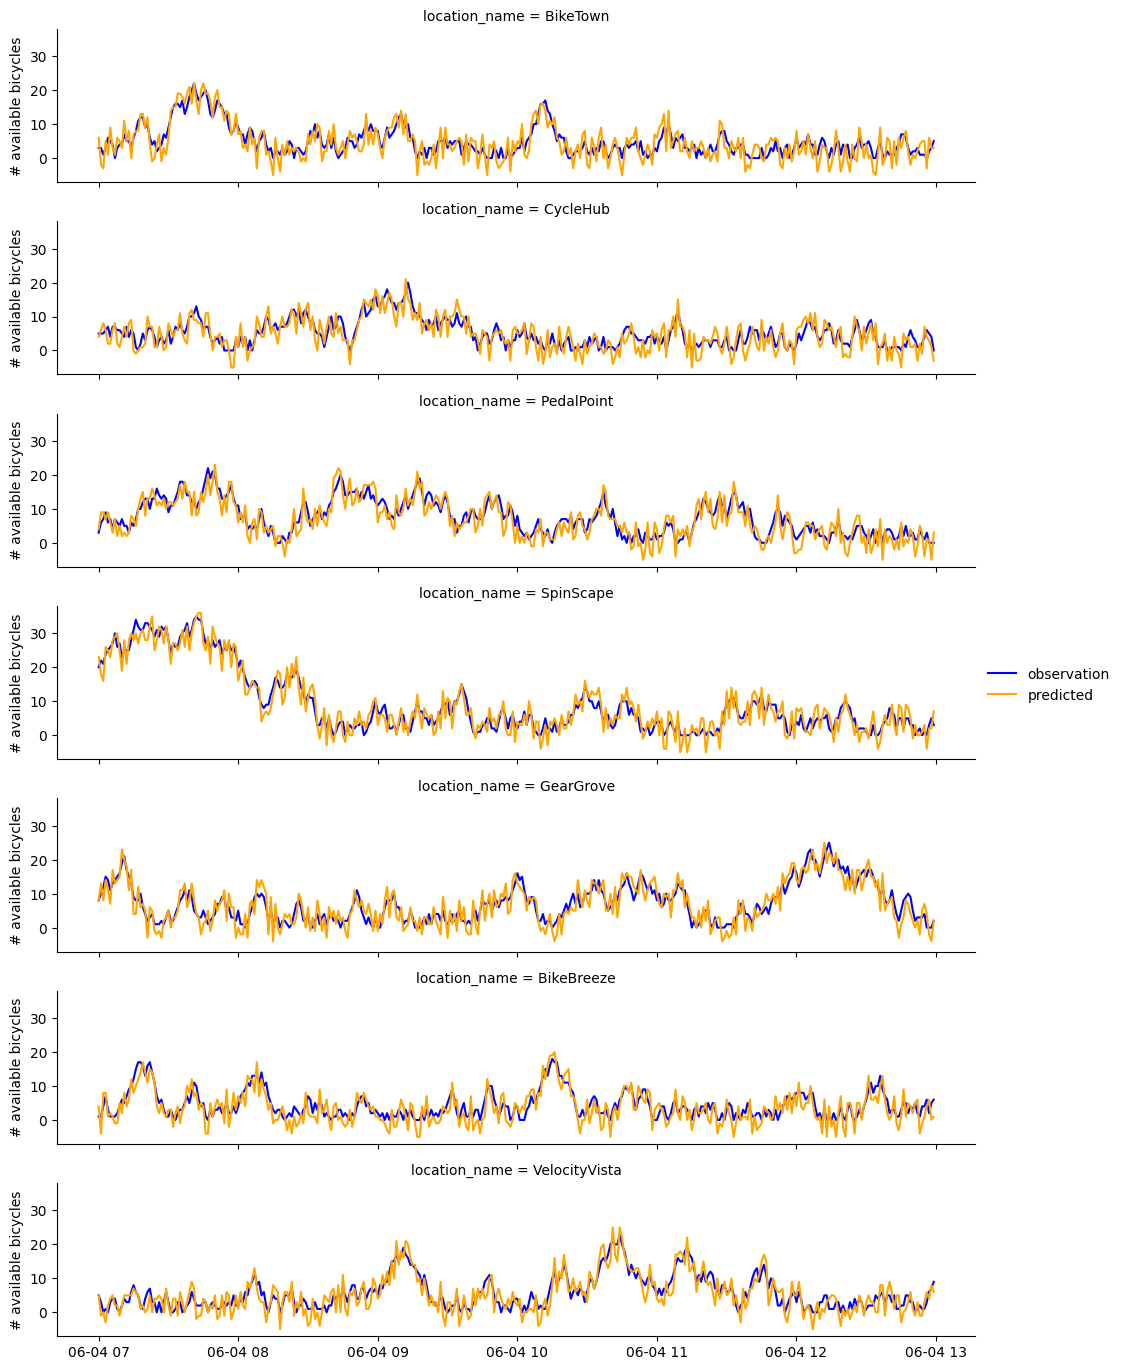

In [58]:
start_dt = "2023-06-04 07:00"
end_dt = "2023-06-04 13:00"

df_to_plot = availability_df[(availability_df["timestamp"]>=start_dt) & (availability_df["timestamp"]<end_dt)]

g = sns.FacetGrid(df_to_plot, row="location_name", aspect=5, height=2)
g.map(sns.lineplot, "timestamp", "n_available", color="blue", label="observation")
g.map(sns.lineplot, "timestamp", "predicted", color="orange", label="predicted")
g.add_legend()
g.set(xlabel="", ylabel="# available bicycles")